### Testing Higher-Order and DistanceBand functionality for WSP builder

All tests are performed on [dual-core, 4 threads, i-5 7200U cpu], Order of testing is as follows:
#### performance tests
- **numba-fied**
 - _`order`_ = 1, _`contiguity`_ = `queen`, [3,4]
- **numba+multithreading**
 - _`order`_ = 1, _`contiguity`_ = `queen`, [5,6]
- **higher_order**
 -  _`order`_ = 2, _`contiguity`_ = `queen`, [7,8]
- **distance_band**
 -  _`order`_ = 2, _`contiguity`_ = `queen`, [9,10]

#### functional tests
Performed on dataset not containing missing values.
- **Rook**
 -  _`order`_ = 3, [12]
- **queen**
 -  _`order`_ = 2, [13]


In [1]:
from libpysal.weights import *
import numpy as np
import xarray as xr
from splot import libpysal as splot
import matplotlib.pyplot as plt
%reload_ext memory_profiler

In [2]:
da = xr.open_rasterio("nasadem_sd.tif") 
da.shape

(1, 3515, 5510)

In [3]:
# numba-fied
%memit da2WSP(da, "queen", k=1, n_jobs=1)

peak memory: 2242.64 MiB, increment: 1962.98 MiB


In [4]:
# numba-fied
%timeit da2WSP(da, "queen", k=1, n_jobs=1)

3.69 s ± 5.47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
# numba+multithreading
%memit da2WSP(da, "queen", k=1, n_jobs=-1)

peak memory: 2408.55 MiB, increment: 2007.60 MiB


In [6]:
# numba+multithreading
%timeit da2WSP(da, "queen", k=1, n_jobs=-1)

3.3 s ± 4.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
# higher_order, order=2
%memit da2WSP(da, "queen", k=2, n_jobs=-1)

peak memory: 5533.53 MiB, increment: 5131.91 MiB


In [8]:
# higher_order, order=2
%timeit da2WSP(da, "queen", k=2, n_jobs=-1)

10.3 s ± 27.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
# distance_band, threshold=2 
%memit da2WSP(da, "queen", k=2, n_jobs=-1, distance_band=True)

peak memory: 6446.82 MiB, increment: 6044.85 MiB


In [10]:
# distance_band, threshold=2 
%timeit da2WSP(da, "queen", k=2, n_jobs=-1, distance_band=True)

9.8 s ± 33.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
da = xr.open_rasterio("HARV_RGB_Ortho.tif")
da = da[:1]
da.shape

(1, 2317, 3073)

In [12]:
# checking for the correct result
wsp_ho = da2WSP(da, "rook", k=3, n_jobs=-1)
wsp_db = da2WSP(da, "rook", k=3, n_jobs=-1, distance_band=True)
(wsp_ho.sparse-wsp_db.sparse).nnz

0

In [13]:
wsp_ho = da2WSP(da, "queen", k=2, n_jobs=-1)
wsp_db = da2WSP(da, "queen", k=2, n_jobs=-1, distance_band=True)
(wsp_ho.sparse-wsp_db.sparse).nnz

0

/home/magito/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5d200e2eb0>)

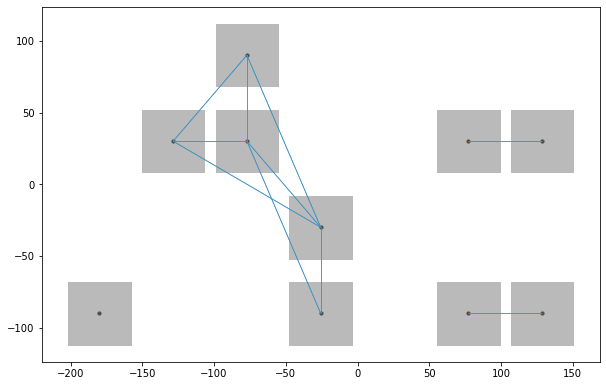

In [14]:
# higher_order, order=2
da_s = raster.testDataArray((1,4,8))
w_queen = raster.da2WSP(da_s, "queen", k=2)
splot.plot_spatial_weights(w_queen, da=da_s)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5d2041c2e0>)

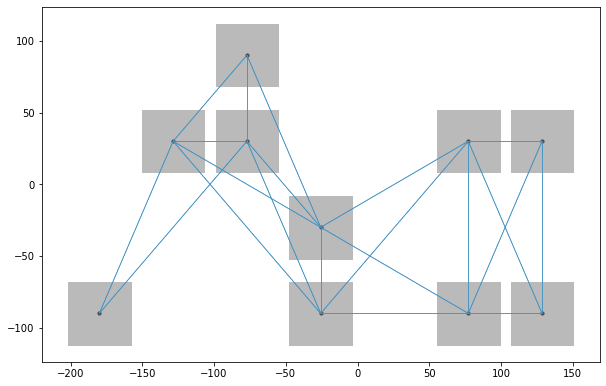

In [15]:
# higher_order, order=2
da_s = raster.testDataArray((1,4,8))
w_queen = raster.da2WSP(da_s, "queen", k=2, distance_band=True)
splot.plot_spatial_weights(w_queen, da=da_s)